In [1]:
from scipy.ndimage.filters import gaussian_filter
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sys
import os

sns.set_style('darkgrid',
              {
                  'axes.facecolor':'black',
                  'axes.grid':False
              })

In [2]:
data = pd.read_csv("globalsignal_temp.csv",index_col=0)

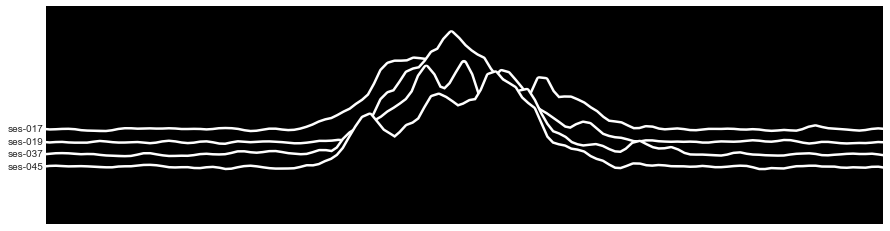

In [3]:
hgt = 1000
zorder = 1
ticks = []
labels = []


fig,ax = plt.subplots(1,figsize=(15,4))
for column in data:
    # get global signal
    globalts = np.array(data[column])
    globalts = globalts-np.mean(globalts)
    bins = np.arange(-100,100,0.6)
    hst = np.histogram(globalts,bins=bins)
    # derive x and y
    hstsm = np.array(hst[0]) + hgt
    hstsm = hstsm + np.random.normal(0,0.4,len(hstsm))
    hstsm = gaussian_filter(hstsm,1)
    bins = np.arange(-99.7,99.7,0.6)
    # poligon under the histogram
    hstpg = np.append(hstsm,np.zeros(len(hstsm)))
    bnspg = np.append(bins,bins[::-1])
    points = [(bnspg[x],hstpg[x]) for x in range(len(hstpg))]
    triangle = plt.Polygon(points,closed=None,edgecolor=None,color='black',lw=2,zorder=zorder)
    ax.add_artist(triangle)
    # draw plot
    ax.plot(bins,hstsm,color='white',lw=7,zorder=zorder)
    ticks.append(hgt+1)
    labels.append(column)
    hgt -= 3
    zorder+=1

plt.xlim([-40,40])
plt.ylim([hgt-10,1030])
plt.yticks(ticks,labels)
plt.xticks([])
ax.autoscale_view()
plt.show()